In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, complete_graph
from networkx.generators import circulant_graph

In [13]:
# warnings are not important :)
import warnings
warnings.filterwarnings('ignore')

In [14]:
# import graph module
import sys
sys.path.append("../")
from methods.gradient_tracking import *

## Preparation

In [15]:
N = 10
#G = complete_graph(N)
G = circulant_graph(N, [1])

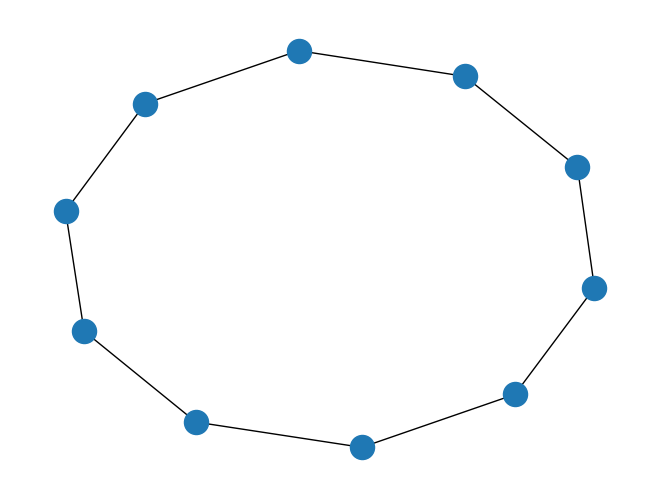

In [16]:
nx.draw(G)

In [17]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [18]:
for (u, v) in G.edges():
    #G.edges[u,v]['weight'] = random.random()
    G.edges[u,v]['weight'] = 1/2

In [19]:
nx.adjacency_matrix(G).todense()

matrix([[0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
        [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ]])

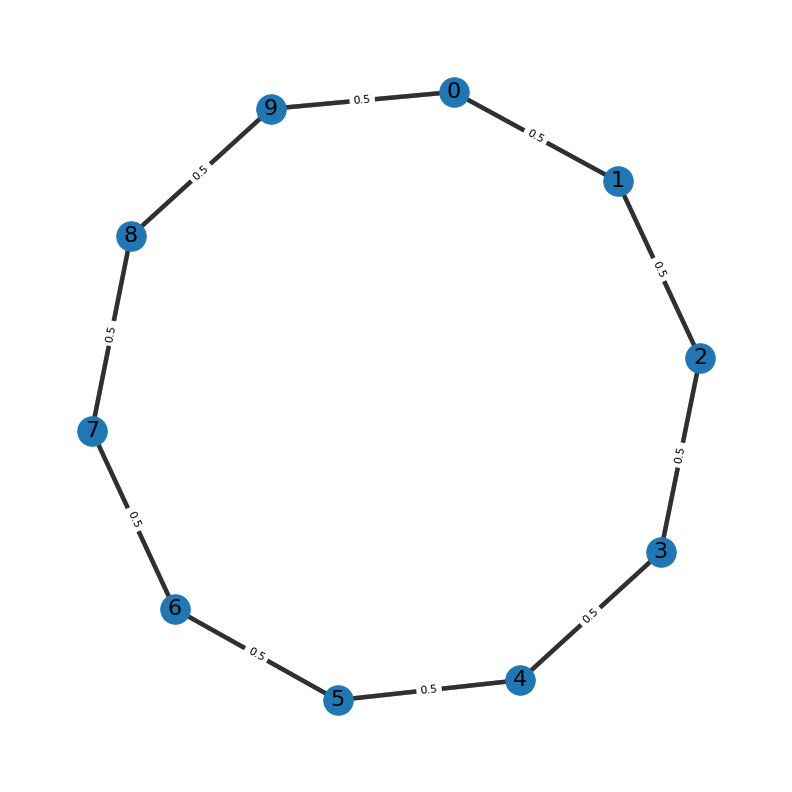

In [20]:
#elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

w_08 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.8]
w_06 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.6]
w_04 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.4]
w_02 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.2]
w_00 = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.0]


pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

edge_labels = nx.get_edge_attributes(G, "weight")
for key in edge_labels:
    edge_labels[key] = np.round(edge_labels[key], 2)

plt.figure(figsize=(10, 10), dpi=80)
    
nx.draw_networkx_nodes(G, pos, node_size=700)

nx.draw_networkx_edges(G, pos, edgelist=w_08, width=4, alpha=1.0)
nx.draw_networkx_edges(G, pos, edgelist=w_06, width=4, alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=w_04, width=4, alpha=0.6)
nx.draw_networkx_edges(G, pos, edgelist=w_02, width=4, alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=w_00, width=4, alpha=0.2)

#nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Examples

In [21]:
def logres_fun(x):
    return 1/(1+np.exp(x))

def calc_delta_Fx(W, X):
    return W * logres_fun(X)

0 	X:	 [[-0.05  0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.77]]
0 	S:	 [[0.44004788 0.4161624  0.45041109 0.42591911 0.40178359 0.37811276
  0.35500631 0.33255391 0.36859868 0.34623351]]
sum delta X:	 [1.3103822067913387]

1 	X:	 [[0.42499508 0.05499638 0.15999549 0.23999573 0.31999596 0.3999962
  0.47999642 0.55999664 0.66499578 0.29499707]]
1 	S:	 [[0.49200097 0.36193372 0.45139522 0.42737708 0.40369471 0.38045054
  0.3577392  0.33564626 0.42185787 0.293226  ]]
sum delta X:	 0.36747018221512606

2 	X:	 [[0.17499281 0.29249091 0.14749182 0.23999147 0.31999194 0.39999241
  0.47999287 0.57249253 0.42749338 0.5449915 ]]
2 	S:	 [[0.39185462 0.43764895 0.42292933 0.42592022 0.40178466 0.37811375
  0.35500725 0.3574259  0.34788821 0.39259103]]
sum delta X:	 0.42554407313997666

3 	X:	 [[0.41873646 0.16123853 0.26623657 0.23373776 0.31998792 0.39998863
  0.48623879 0.4537399  0.55873797 0.30123997]]
3 	S:	 [[0.47433268 0.37832173 0.46129561 0.41223507 0.40178464 0.37811376
  0.3676163

matrix([[0.4101014 ],
        [0.30670955],
        [0.40681752],
        [0.30812461],
        [0.40781234],
        [0.3120234 ],
        [0.41171107],
        [0.31301805],
        [0.41312593],
        [0.309734  ]])

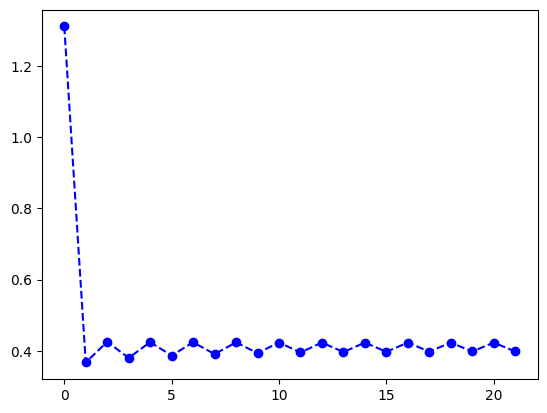

In [22]:
W  = nx.adjacency_matrix(G).todense()
#X0 = [[random.randint(0, 10)] for i in range(N)]
#X0 = [[random.random()] for i in range(N)]
#X0 = [[1] for i in range(N)]
#X0 = [[i] for i in range(N)]
X0 = [[i/N] for i in range(N)]

e = 0.1
alpha = 0.00001
theta = 0.9
mu = 0.99

gradient_tracking(
    W = W, 
    X0 = X0, 
    e = e, 
    alpha = alpha, 
    theta = theta,
    mu = mu,
    calc_delta_Fx = calc_delta_Fx,
    max_iter=20,
    use_logging=True,
    need_graph=True
)